## Dosedanji sklepi

Pri deskriptivni analizi podatkov in večnivojskem hierarhičnem modeliranju smo opazovali porazdelitev vhodnih podatkov ter iskali povezave oz. raziskovali kolikšna in kakšna je korelacija med posameznimi parametri konteksta. Prišli smo do naslednjih pomembejših sklepov:

* Uporabniki niso razlikovali med vprašanji oz. so dajali enake odgovore pri vseh treh kategorijah na vprašalniku, zato bomo v nadaljevanju vprašalnik poenostavli in bodo imeli uporabniki na voljo le dve možnosti DA - trenuten prikaz novic mi je všeč ali pa NE - trenuten prikaz novic mi ni všeč.
* Uporabnikom sploh niso všeč prikazi novic, ki ne vsebujejo slik. V nadaljevanju bomo torej izločili vhodni parameter, ki nam pove ali slike so prisotne, saj bodo te vedno na voljo.
* Na podlagi zbranih podatkov velja, da z rastjo internetne povezave pada zadovoljstvo uporabnika, a si ta pojav težko razložimo. Prav tako pa je to lahko zgolj slučaj, saj je zelo malo takih podatkov, kjer je hitrost internetne povezave enaka nič, kar pomeni, da izbrani uporabniki niso imeli težav z internetno povezavo.
* Fizična aktivnost vpliva na končno uporabniško izkušnjo. Izkaže se namreč, da uporabniki dajejo prikazom novic najslabše ocene, ko se vozijo, nekoliko boljše ko hodijo in najboljše, ko so pri miru. Pri izgradnji končnega modela bomo torej fizično aktivnost uporabnika upoštevali
* Nivo baterije in svetlost okolice vplivata na izbiro teme aplikacije. Z višanjem nivoja baterije in svetlosti okolice raste tudi pribljubljenost svetle teme aplikacije. Nižji kot je nivo baterije in manjša kot je svetlost okolice bolj je priljubljena temna tema aplikacije. Pri tem pa velja, da na izbiro teme aplikacije ima večji vpliv svetlost okolice kot nivo baterije, saj koeficienti premic zavzemajo absolutno večje vrednosti za svetlost okolice kot pri koeficientih za nivo baterije. Pri izgradnji končnega modela bomo torej upoštevali le svetlost okolice, saj si želimo čim enostavnejši (čim manjši nabor vhodnih parametrov) model, ki najbolje napoveduje zadovoljstvo uporabnika.
* Bolj kot je pozno uporabniki dajejo pogledom slabše ocene, vendar je vpliv ure v dnevu pri izgradnji večnivojskega hierarhičnega modela zanemarljivo majhen. Uro bomo torej v nadaljevanju izločili.
* Če dodamo svetlost zaslona kot vhodni parameter v večnivojski hierarhični model ima ta slabše rezultate, kot če je nebi, zato jo bomo v nadaljevanju izločili pri izgradnji končnega modela.
* Uporabniki so največkrat izbirali med 'xLargeCards' in 'largeCards' pogledoma, saj zavzemata največji delež zbranih podatkov (kar 60% delež podatkov). Prav tako pa se med seboj najbolj razlikujeta, zato bomo le njiju uporabili kot nabor različnih vrednosti za parameter 'layout' oz. pogled.  
* V splošnem je velika pisava bolj priljubljena od manjše pri čemer se kažejo največja odstopanja, ko uporabnik hodi. Takrat manjša pisava pridobiva veliko bolj negativne ocene v primerjavi z veliko. 

Česar pa pri analizi dosedanjih podatkov nismo upoštevali pa je uporabnik sam. Do sedaj smo namreč analizirali podatke in gradili modele z globalnga vidika in ne personaliziranega. V našem primeru bi se lahko izkazalo, da ima na sam izbor velikosti pisave, pogleda in teme aplikacije vpliv uporabnik sam, zato bomo gradili personalizirane modele s pomočjo `aktivnega učenja`, saj si želimo s čim bolj kakovostnimi podatki iterativno izboljševati model. 

V nadaljevanju bodo modeli vsebovali naslednje vhodne parametre:
* Fizična aktivnost uporabnika, ki lahko zavzema vrednosti ON_FOOT, IN_VEHICLE, STILL
* Svetlost okolice (vrednost merjena v luxih)
* Pogled oz. layout (zavzema vrednosti xLargeCards in largeCards)
* Tema aplikacije (svetla ali temna)
* Velikost pisave (majhna ali velika)

Način predikcije prikaza novic in gradnje personaliziranih modelov pa bo sledeč (sam diagram poteka je prikazan na dnu dokumenta):
* Najprej preberemo parametre konteksta (svetlost okolice in fizično aktivnost uporabnika) nato osem različnih vhodov (pogled + tema + velikost pisave) oz. načinov prikaza novic poskusimo klasificirati kot DA - uporabniku je všeč ali pa NE - uporabniku ni všeč izbrana kombinacija vhodov, ki predstavlja prikaz novic. 
* Verjetnosti posameznih klasifikacij za DA si zabeležimo in na izhod izberemo tisti prikaz novic, za katerega je model najbolj prepričan, da je klasificiran kot DA.
* Če je največja verjetnost pod določeno mejo (določena v nadaljevanju), potrebujemo interakcijo uporabnika, da oceni ali mu je pogled bil zares všeč ali pa ni, zato mu bomo postavili kratek vprašlnik, pri čemer lahko izbira le med odgovoroma DA - pogled mi je všeč ali pa NE - pogled mi ni všeč. 
* Če v dvajsetih sekundah uporabnik spremeni katerikoli parameter prikaza novic si zabeležimo uporabnikovo spremembo, saj vemo, da se je model zmotil pri izbiri najboljšega prikaza, saj je uporabnik relativno hitro (v času dvajsetih sekund) zamenjal izbran način prikaza novic. Takrat vprašalnika uporabniku ne postavimo, saj vemo, da mu napoved modela ni bila všeč.
* Novo zabeležen podatek za posameznega uporabnika bomo uporabili za izgradnjo novega modela.
* Da uporabniku nebi neprestano spreminjali prikaza novic, bomo način prikaza novic napovedovali le takrat, ko je to potrebno. To za nas pomeni, da začnemo predikcijo prikaza novic šele, ko se kontekst spremeni in preteče vsaj 30 sekund od zadnje napovedi. Nov prikaz novic bomo od modela zahtevali torej, ko se spremeni fizična aktivnost uporabnika ali pa ko se nivo svetlosti okolice spremeni. Nivoji bodo definirani po tabeli [wikipedia](https://en.wikipedia.org/wiki/Lux) in bodo imeli definirane štiri različne vrednosti (posameznih nivoji svetlosti okolice bodo definirani enako kot pri večnivojskem hierarhičnem modeliranju).
* Prav tako pa bi vprašalnik postavili tudi naključno z določeno verjetnosti odvisno fizične aktivnosti uporabnika. Kot bomo videli v nadaljevanju imamo največ podatkov, ko je uporabnik pri miru (368), 92 podatkov, ko uporabnik hodi in le 43, ko je uporabnik v avtomobilu. Bolj pomembno je zbiranje tistih podatkov, ki jih je manj. To pomeni, da je približno devetkrat več tistih podatkov, ko je uporabnik pri miru kot tistih, ko se uporabik vozi. Štirikrat več pa je tistih podatkov, ko je uporabnik pri miru kot tistih, ko uporabnik hodi. V skladu s porazdelitvijo podatkov, bi želeli v določenih trenutkih naključno postaviti vprašalnik tudi, ko je model prepričan, kaj postaviti na izhod. Tako lahko postavimo enačbo 9x+4x+x=1 => x=1/14. To pomeni, da bomo z verjetnostjo 7% postavili vprašalnik uporabniku, tudi, ko model je prepričan, kako prikazati novice, ko je uporabnik pri miru. Z verjetnostjo 9/14 oz. 64% bomo vprašalnik postavili uporabniku, ko se uporabnik vozi tudi, ko model z dovolj veliko verjetnostjo napove izhod sistema. Z verjetnostjo 4/14 oz. 28% pa bomo vprašalnik postavili, ko uporabnik hodi kljub temu da je model dovolj prepričan, kako prikazati novice.
* Porazdelitev podatkov glede fizične aktivnosti lahko sproti posodabljamo in tako dinamično prilagajamo verjetnost, kdaj naključno zahtevati uporabniško interakcijo.

Active learning način bo potekal dva tedna. V tem času lahko pričakujemo, da bo zbranih dovolj podatkov in bi model moral biti boljši od naključnega ali pa večinskega klasifikatorja. 

Po dveh tednih pa bomo primerjali nove personalizirane modele z naključnim klasifikatorjem na posameznem uporabnikih. Prvi dan bomo prikaz novic napovedovali naključno, drugi dan pa z dejanskim modelom itd. Na koncu bomo  analizirali še metrike kot so `F1-Score, Precision, Recall, Accuracy, Mean kfold Accuracy` končnih modelov.

In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
import numpy as np
from math import sqrt
from sklearn.model_selection import KFold

In [122]:
def performOneHotEncoding(df, catNames):
    for catName in catNames:
        df = pd.concat([df, pd.get_dummies(df[catName], prefix=catName)], axis=1)
        df.drop([catName], axis=1, inplace=True)
    return df

In [123]:
def izrisi_ocene(df, column_name):
    values = df[column_name]
    ocene, counts = np.unique(values, return_counts=True)
    print("Vrednosti ocen ",ocene)
    print("Stevilo zbranih vnosov ", counts)
    x_pos = [i for i in range(5)]
    plt.bar(x_pos, counts)

    plt.xlabel("Uporabnikove ocene")
    plt.ylabel("Stevilo zbranih vnosov")
    plt.title(column_name)

    plt.xticks(x_pos, ocene)

    plt.show()

In [124]:
df = pd.read_csv("Dataset/mlDataset.csv")
df = performOneHotEncoding(df, ['user activity', 'layout', 'theme', 'images', 'font size'])
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Porazdelitev vrednosti ocen posameznih kategorij vprašalnika na novih podatkih

Iz oblike spodnjih histogramov opazimo, da še vedno velja dejstvo (na novih podatkih), da so uporabniki enako odgovarjali na vse tri kategorije. Odgovori pa so bili zelo pozitivni, saj smo izbrali prikaze novic z najboljšimi ocenami, kar je tudi pričakovano. Za novo mejo, ki bi definirala ali je prikaz novic zadovoljiv lahko postavimo šest. To pomeni, da bomo v nadaljevanju kot DA označili poglede, ki so imeli ocene šest in NE tiste prikaze novic, ki so imeli ocene pod šest. 

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [ 31  15  25 133 299]


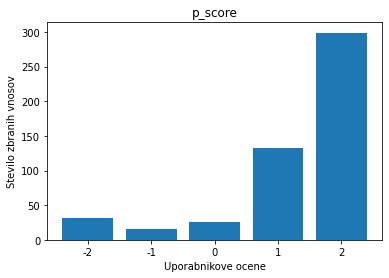

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [ 32   8  27 128 308]


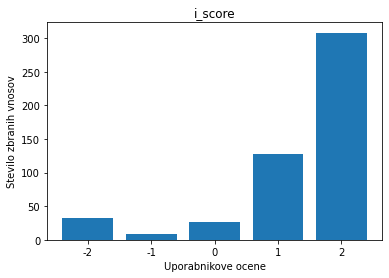

Vrednosti ocen  [-2 -1  0  1  2]
Stevilo zbranih vnosov  [ 34  13  26 123 307]


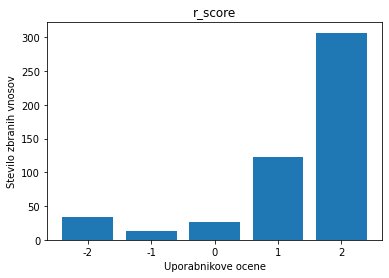

In [125]:
izrisi_ocene(df, 'p_score') # preference score
izrisi_ocene(df, 'i_score') # informativness score
izrisi_ocene(df, 'r_score') # readability score

## Porazdelitev podatkov glede na fizično aktivnost

Tako kot pri deskriptivni analizi vseh zbranih podatkov se izkaže, da je največ podatkov, ko so bili uporabniki pri miru in manj, ko so hodili ali pa se vozili. Porazdelitev bomo upoštevali pri aktivnem učenju.

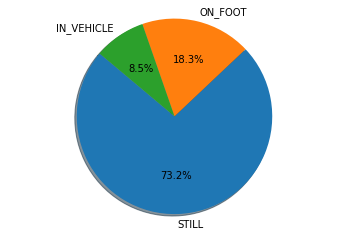

[368, 92, 43]


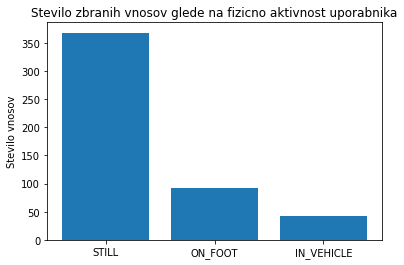

In [126]:
def draw_pie(labels, sizes):
    plt.pie(sizes, labels=labels,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
    
def izrisi_aktivnosti(vals):
    print(vals)
    labels = ('STILL', 'ON_FOOT','IN_VEHICLE')
    y_pos = np.arange(len(labels))
    plt.bar(y_pos, vals, align='center')
    plt.xticks(y_pos, labels)
    plt.ylabel('Stevilo vnosov')
    plt.title('Stevilo zbranih vnosov glede na fizicno aktivnost uporabnika')
    plt.show()
    
c0 = len(df.loc[(df['user activity_STILL']) == 1])
c1 = len(df.loc[(df['user activity_ON_FOOT']) == 1])
c2 = len(df.loc[(df['user activity_IN_VEHICLE']) == 1])

draw_pie(['STILL', 'ON_FOOT','IN_VEHICLE'], [c0, c1, c2])
izrisi_aktivnosti([c0,c1,c2])

## Izgradnja modelov

V nadaljevanju bomo gradili posamezne modele na podatkih, ki vsebujejo `xLargeCards` ali pa `largeCards` poglede in vsebujejo slike. Podatkov je manj in posledično so tudi novo zgrajeni modeli slabši od tistih, ki smo jih gradili v začetku. Prav tako pa je težje napovedati boljši izhod, če izbiramo med najbolšimi prikazi novic. Kot smo predhodno omenili bomo gradili personalizirane modele s pomočjo aktivnega učenja. Izbrali bomo torej model z najboljšimi metrikami in ga poskusili še izboljšati.

In [127]:
featureNames = ['user activity_STILL', 'user activity_IN_VEHICLE', 'user activity_ON_FOOT',
                'theme_light-theme', 'theme_dark-theme',
                'layout_largeCards', 'layout_xLargeCards',
                'env brightness',
                'font size_large-font', 'font size_small-font']
x = df[featureNames]
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=421)

In [128]:
def analyseDummyClassifier(x, y, X_train, X_test, y_train, y_test):
    dummy_clf = DummyClassifier(strategy="most_frequent")
    dummy_clf.fit(X_train, y_train)
    scores = cross_val_score(dummy_clf, x, y, cv=10)
    print("Dummy cross_val_score = ", scores.mean())
    y_pred = dummy_clf.predict(X_test)
    tn, fp, fn, tp =  confusion_matrix(y_test, y_pred).ravel()
    acc = (tp + tn) / (tn + fp + fn + tp)
    print("Dummy accuracy = ",acc)

Na podlagi spodnjega klica metode lahko opazimo, da ima večinski klasifikator srednjo vrednost natančnosti po kfold preverjanju 52% in da je natančnost modela 54% potem ko podatke razdelimo na 80% učnih in 20% testnih. Dobljene rezultate lahko uporabimo kot osnovo za primerjavo modelov v nadaljevanju. 

In [129]:
analyseDummyClassifier(x, y, X_train, X_test, y_train, y_test)

Dummy cross_val_score =  0.5248235294117647
Dummy accuracy =  0.5445544554455446


In [130]:
def analyseModel(clf, x, y, X_train, X_test, y_train, y_test):
    
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)
    
    fpr, tpr, thr = roc_curve(y_test, y_pred_proba[:, 1])
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    crossValidationScores = cross_val_score(clf, x, y, cv=10)
    tn, fp, fn, tp =  confusion_matrix(y_test, y_pred).ravel()
                
    print("Recall = ", recall)
    print("Precision score = ", precision)
    print("F1 = ",f1)
    print("Accuracy = ", acc)
    print("10FoldCrossVal score = ",crossValidationScores.mean())
    print("AUC = ",auc)
    print("=====================================")
    plt.plot(fpr, tpr, label="RandomForest")
    plt.legend("RandomForestClassifier")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()
    

## Analiza učinkovitosti random forest klasifikatorja

Recall =  0.717391304347826
Precision score =  0.6226415094339622
F1 =  0.6666666666666666
Accuracy =  0.6732673267326733
10FoldCrossVal score =  0.6046666666666667
AUC =  0.7426877470355732


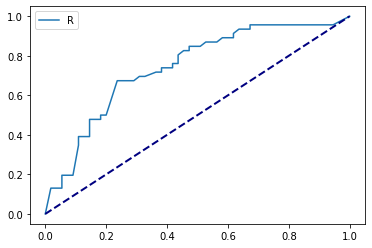

In [131]:
clf = RandomForestClassifier(n_estimators=100, random_state=421)
clf.fit(X_train, y_train)
analyseModel(clf, x, y, X_train, X_test, y_train, y_test)

## Analiza učinkovitosti Bayesovega klasifikatorja

Recall =  0.043478260869565216
Precision score =  0.5
F1 =  0.08
Accuracy =  0.5445544554455446
10FoldCrossVal score =  0.5647058823529412
AUC =  0.6324110671936759


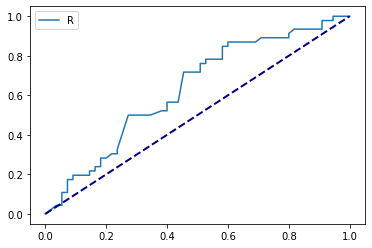

In [132]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
analyseModel(gnb, x, y, X_train, X_test, y_train, y_test)

## Analiza učinkovitosti AdaBoost klasifikatorja

Recall =  0.782608695652174
Precision score =  0.6
F1 =  0.6792452830188679
Accuracy =  0.6633663366336634
10FoldCrossVal score =  0.6125882352941177
AUC =  0.6865612648221344


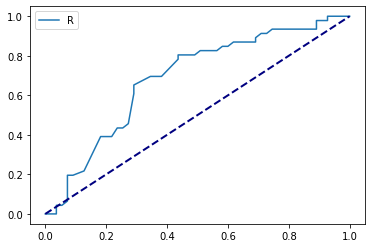

In [133]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=1)
clf.fit(X_train, y_train)
analyseModel(clf, x, y, X_train, X_test, y_train, y_test)

## Analiza učinkovitosti odločitvenega drevesa

Recall =  0.6956521739130435
Precision score =  0.6037735849056604
F1 =  0.6464646464646465
Accuracy =  0.6534653465346535
10FoldCrossVal score =  0.6027450980392157
AUC =  0.6104743083003953


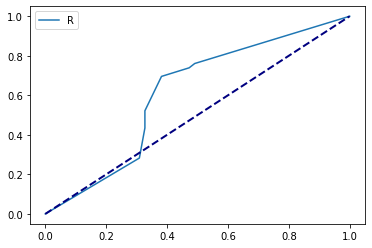

In [134]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
analyseModel(clf, x, y, X_train, X_test, y_train, y_test)

## Primerjava zgrajenih modelov

|                          | Precision | Recall | F1-Score | Accuracy | AUC  | 10Fold cross validation mean accuracy |
|--------------------------|-----------|--------|----------|----------|------|---------------------------------------|
| Random forest classifier | 0.623     | 0.717  | 0.67     | 0.67     | 0.74 | 0.60                                  |
| Bayes classifier         | 0.5       | 0.04   | 0.08     | 0.54     | 0.63 | 0.56                                  |
| AdaBoost classifier      | 0.6       | 0.78   | 0.68     | 0.66     | 0.69 | 0.61                                  |
| Tree classifier          | 0.60      | 0.70   | 0.64     | 0.65     | 0.61 | 0.60                                  |

Na podlagi zgornjih rezultatov lahko opazimo, da najboljše rezultate daje t.i. `Random Forest classifier`, saj ima največje vrednosti metrik kot so `AUC, Precision, Accuracy` in približno enake vrednosti ostalih metrik. Metrika `Precision` ima v našem primeru največjo vlogo, saj si želimo, da večkrat model napove izhod DA in je dejansko DA kot, da bi model napovedal DA in bi bila dejanska vrednost NE. Model pa lahko izboljšamo na podlagi ROC krivulje, tako, da izberemo vrednost za threshold tisto, ki je na grafu najbližja točki (0,1). To lahko storimo s pomočjo klica spodnje funkcije. 

In [135]:
def findOptimalThreshold(fpr, tpr, thr):
    minDistance = 100
    optimum = {"fpr": 0, "tpr": 0, "thr":0}
    
    for fpr_v, tpr_v, thr_v in zip(fpr, tpr, thr):
        distance = sqrt(fpr_v**2 + (1-tpr_v)**2)
        if distance < minDistance:
            minDistance = distance
            optimum["fpr"] = fpr_v
            optimum["thr"] = thr_v
            optimum["tpr"] = tpr_v
            
    print("Optimum ",optimum)
    return optimum

In [136]:
clf = RandomForestClassifier(n_estimators=100, random_state=421)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_pred_proba[:, 1])
optimum = findOptimalThreshold(fpr, tpr, thr)

Optimum  {'fpr': 0.23636363636363636, 'tpr': 0.6739130434782609, 'thr': 0.5920337252470018}


In [137]:
optimalThr = optimum['thr']
predicted_proba = clf.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= optimalThr).astype('int')
accuracy = accuracy_score(y_test, predicted)
print("New accuracy score = ",accuracy)
tn, fp, fn, tp =  confusion_matrix(y_test, predicted).ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fp)
f1 = 2 * (precision*recall/(precision+recall))

print("New precision score = ",precision)
print("New recall score = ", recall)
print("New f1 score = ",f1)

New accuracy score =  0.7227722772277227
New precision score =  0.7045454545454546
New recall score =  0.7045454545454546
New f1 score =  0.7045454545454546


In [138]:
def performKFoldValidation(clf, x,y):
    a = []
    for train_index, test_index in kf.split(x):
        X_train = x.iloc[train_index,:]
        y_train = y.iloc[train_index]
    
        clf.fit(X_train, y_train)
    
        y_test = y.iloc[test_index]
        X_test = x.iloc[test_index,:]
        predicted_proba = clf.predict_proba(X_test)
        predicted = (predicted_proba[:,1] >= optimalThr).astype('int')

        accuracy = accuracy_score(y_test, predicted)
        a.append(accuracy)
    
    avgAcc = sum(a)/len(a)
    print("New kfold score = ",avgAcc)

In [139]:
performKFoldValidation(clf, x, y)

New kfold score =  0.6246274509803922


|                                      | Precision | Recall | F1-Score | Accuracy | 10Fold cross validation mean accuracy |
|--------------------------------------|-----------|--------|----------|----------|---------------------------------------|
| Random forest classifier             | 0.623     | 0.717  | 0.67     | 0.67     | 0.60                                  |
| Random forest with optimal threshold | 0.705      | 0.705  | 0.705    | 0.72     | 0.62                                  |

Na podlagi zgornje tabele vidimo, da smo uspeli izboljšati posamezne metrike modela ob upoštevanju optimalnega `thresholda` izračunanega na podlagi ROC krivulje. V nadaljevanju bomo torej uporabili model Random Forest model, saj se ta izkaže kot najboljši ob upoštevanju vrednosti za threshold, ki je enaka 0.59. 

Z mejo 0.59 si lahko pomagamo za definiranje vrednosti, kdaj model ni prepričan, kaj postaviti na izhod in zahtevamo vprašalnik. V primeru, da imajo vse možnosti prikaza novic verjetnost DA pod 0.59 pomeni, da so vse izbire slabe, vseeno pa nekaj moramo uporabniku prikazati na zaslon. V tem primeru gre za najbolj skrajen primer, ko model ni prepričan s katerim prikazom novic bi bil uporabnik zadovoljen, saj so vsi prikazi kategorizirani kot NE. 

Vendar moramo upoštevati, da je to zgolj le minimalna meja in jo bomo povečali na 0.7, kar pomeni, da bomo uporabniku postavili vprašalnik takrat, ko je največja verjetnost za DA izmed osmih različnih verjetnosti pod vrednostjo 0.7.

Končen način zbiranja podatkov in posodabljana modela je prikazan na spodnjem diagramu:

![diagram](img/ActiveLearningDiagram.png)